**link colab https://colab.research.google.com/drive/1lSArPFSe612PZpy6reYBxwTqCJMYQRrd?usp=sharing**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##read data

In [5]:
iris = pd.read_csv("/content/IRIS.csv")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

##pre-processing

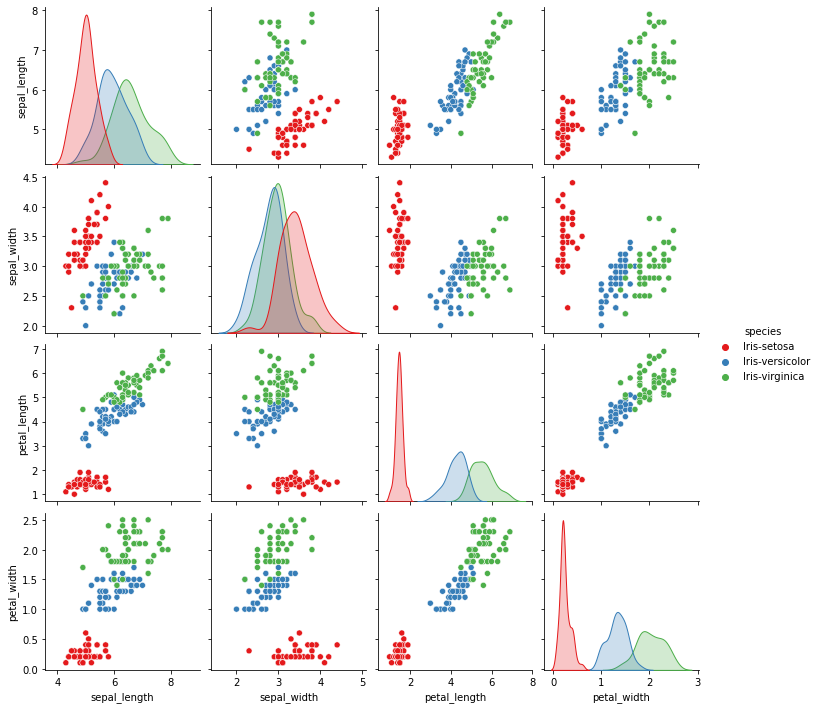

In [9]:
sns.pairplot(iris,hue='species',palette='Set1')

##train test split

In [10]:
x = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
x[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [11]:
y = iris['species'].values
y[0:5]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [13]:
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(x, y, test_size=0.3, random_state=3)

##find best paramter

In [14]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear','poly']
        }
    },  

    'decision_trees': {
        'model': DecisionTreeClassifier(),
        'params' : {
            'criterion': ['gini','entropy'],
            'splitter' : ['best','random'] 

            
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10,30,40,100]
        }
    },
    'KNeighborsClassifier': {
        'model': KNeighborsClassifier(),
        'params' : {
            'n_neighbors': [2,3,4,5,6,7,8,9],
        }    
}
}

In [15]:
from sklearn.model_selection import GridSearchCV
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_trainset, y_trainset)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
dfpred = pd.DataFrame(scores,columns=['model','best_score','best_params'])
dfpred

,model,best_score,best_params
0,svm,0.971429,"{'C': 1, 'kernel': 'rbf'}"
1,decision_trees,0.942857,"{'criterion': 'gini', 'splitter': 'best'}"
2,random_forest,0.942857,{'n_estimators': 1}
3,KNeighborsClassifier,0.952381,{'n_neighbors': 6}


##svm

In [16]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svm = SVC(C = 1)
svm.fit(X_trainset,y_trainset)
predictions = svm.predict(X_testset)
svm_acc = accuracy_score(y_testset, predictions)
print("Accuracy svm : ",svm_acc)

Accuracy svm :  0.9333333333333333


##KNeighborsClassifier

In [17]:
knn = KNeighborsClassifier(6)
knn.fit(X_trainset , y_trainset)
pred = knn.predict(X_testset)
knn_acc = accuracy_score(y_testset, pred)
print("Accuracy knn : ",knn_acc)

Accuracy knn :  0.9555555555555556


##DecisionTree

In [18]:
from sklearn.tree import DecisionTreeClassifier
irisTree = DecisionTreeClassifier()
irisTree

DecisionTreeClassifier()

In [19]:
irisTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier()

In [20]:
predTree = irisTree.predict(X_testset)

In [21]:
from sklearn import metrics
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.9777777777777777


In [22]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_testset,predTree))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       1.00      0.93      0.96        14
 Iris-virginica       0.93      1.00      0.97        14

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



In [23]:
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree

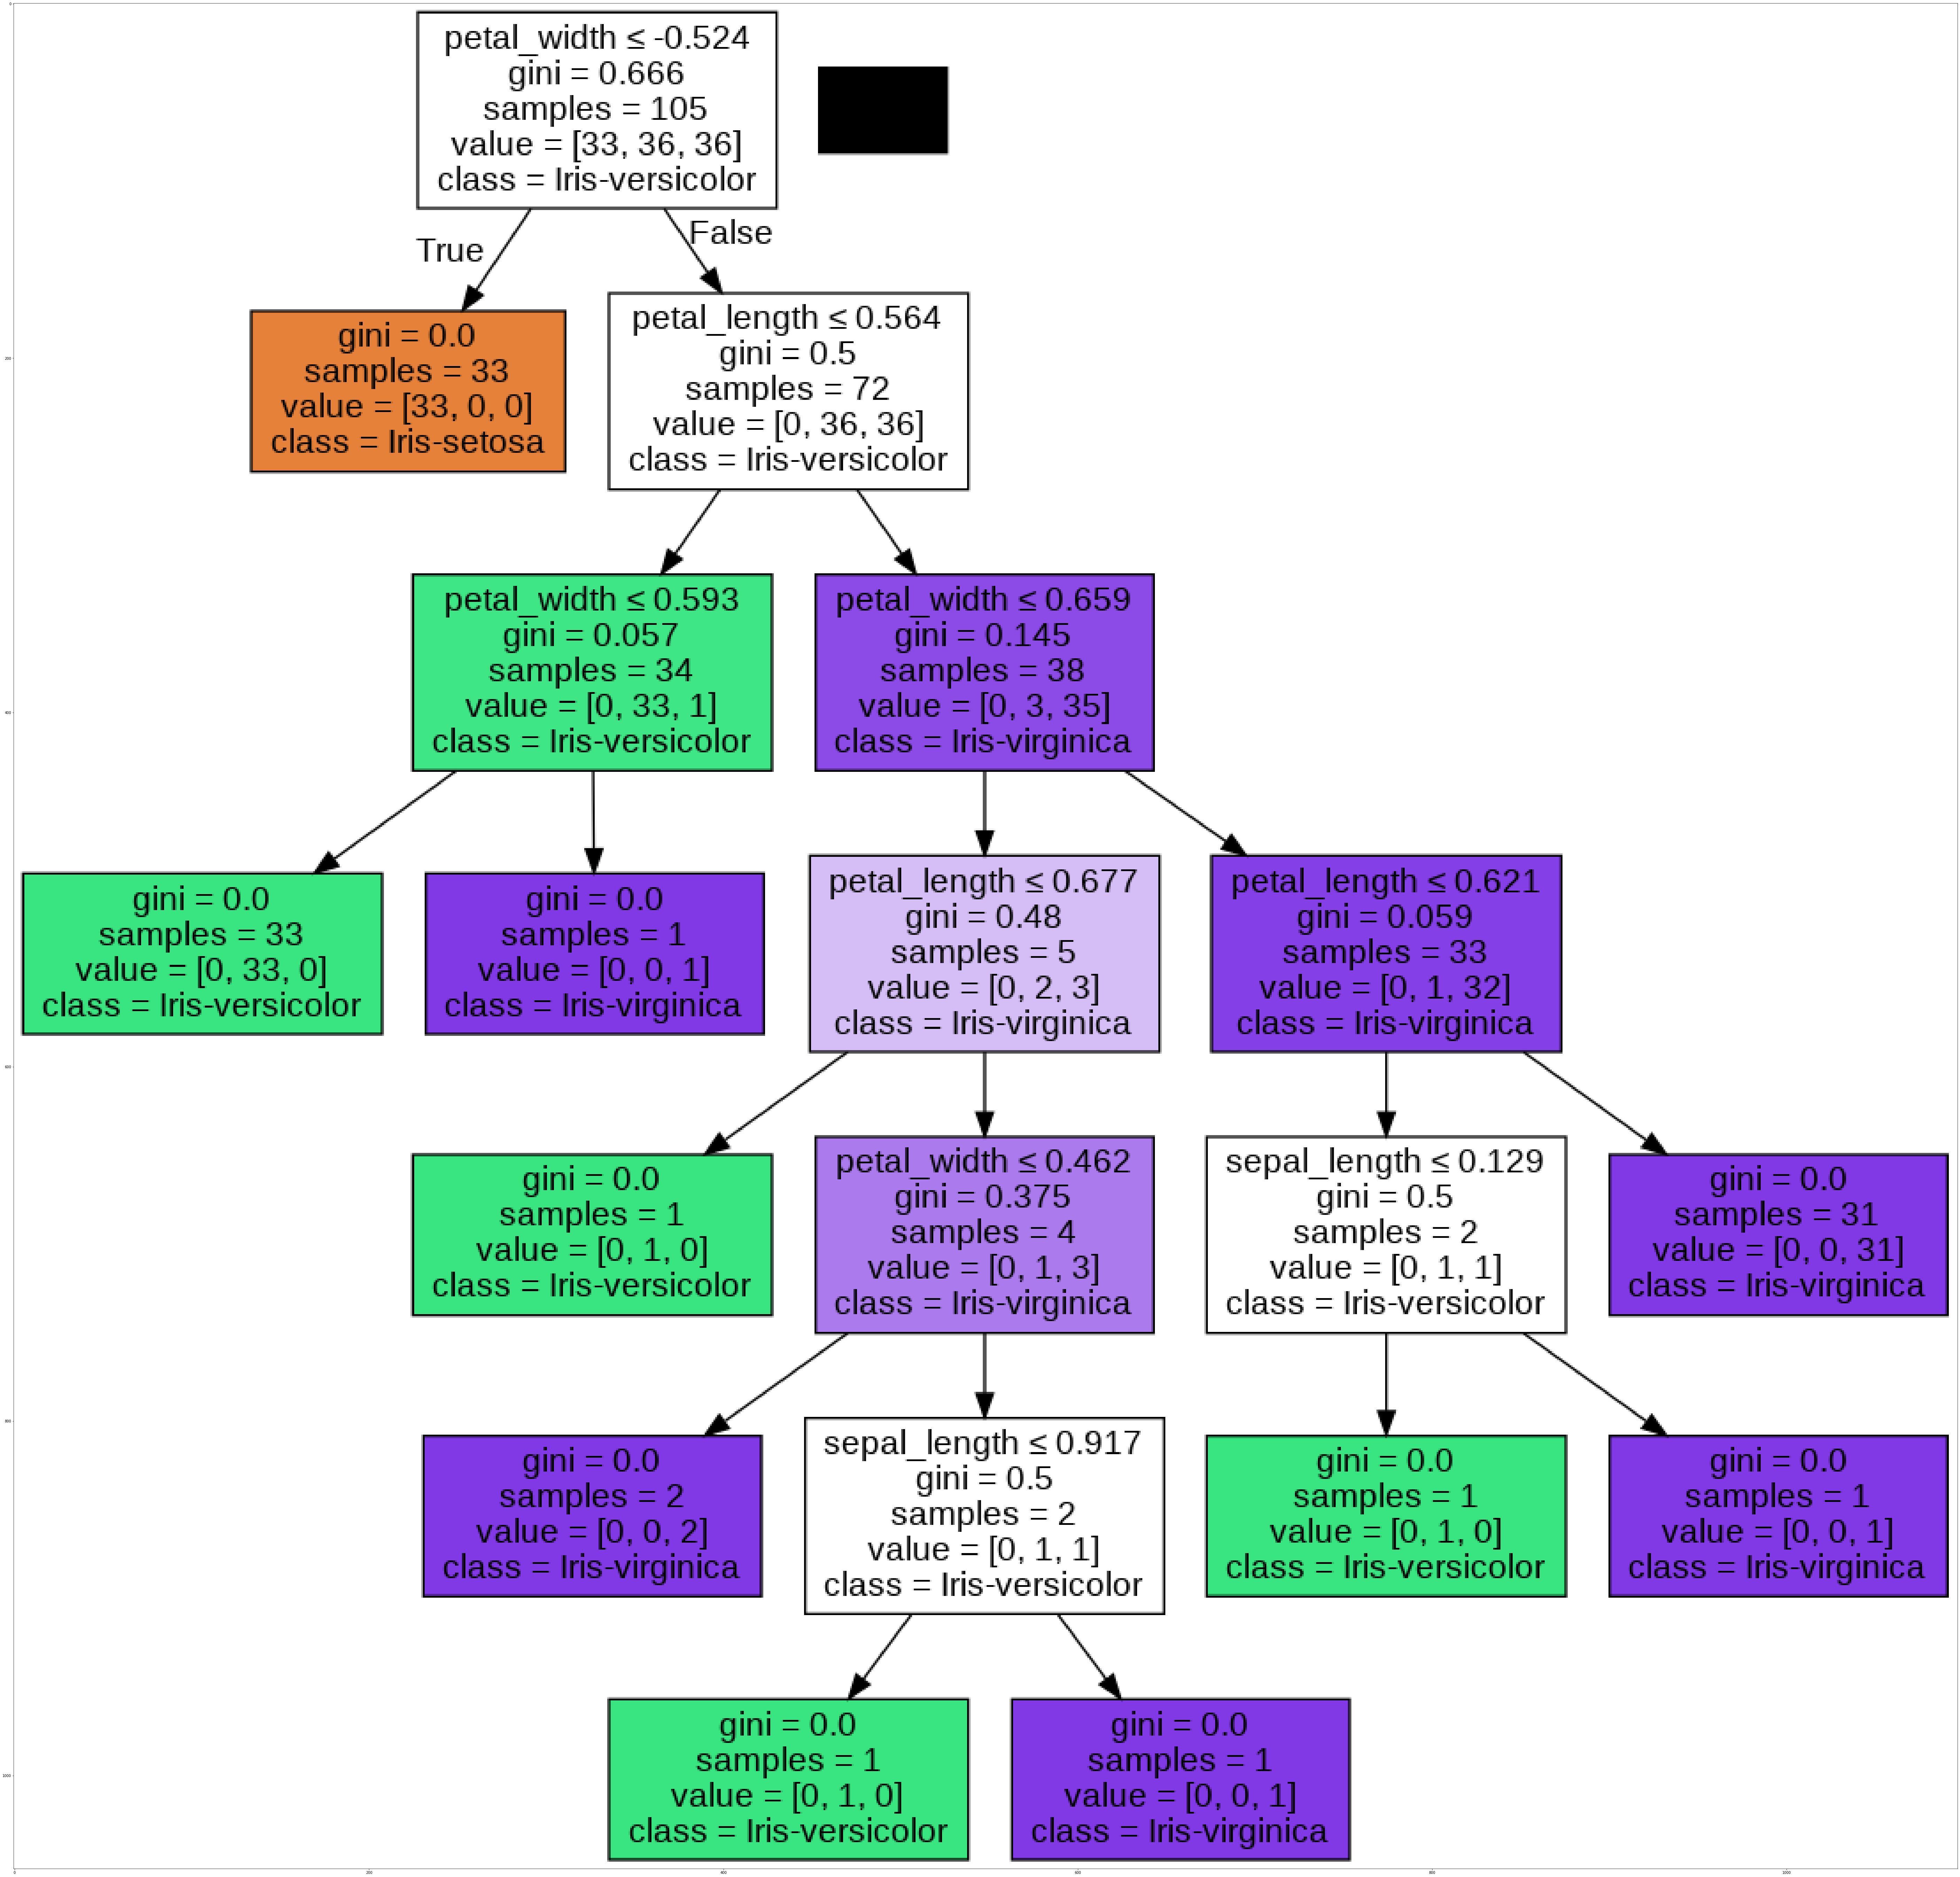

In [24]:
dot_data = StringIO()
filename = "drugtree.png"
featureNames = iris.columns[0:4]
out=tree.export_graphviz(irisTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

##RandomForest

In [25]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=5)
rfc.fit(X_trainset, y_trainset)

RandomForestClassifier(n_estimators=5)

In [26]:
rfc_pred = rfc.predict(X_testset)

In [27]:
print(confusion_matrix(y_testset,rfc_pred))

[[17  0  0]
 [ 0 12  2]
 [ 0  1 13]]


In [28]:
print(classification_report(y_testset,rfc_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       0.92      0.86      0.89        14
 Iris-virginica       0.87      0.93      0.90        14

       accuracy                           0.93        45
      macro avg       0.93      0.93      0.93        45
   weighted avg       0.93      0.93      0.93        45



##DecisionTree entropy

In [29]:
from sklearn.tree import DecisionTreeClassifier
IrisTreeEntropy = DecisionTreeClassifier(criterion  = 'entropy')
IrisTreeEntropy

DecisionTreeClassifier(criterion='entropy')

In [30]:
IrisTreeEntropy.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy')

In [31]:
predTreeEntropy = IrisTreeEntropy.predict(X_testset)

In [32]:
from sklearn import metrics
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTreeEntropy))

DecisionTrees's Accuracy:  0.9777777777777777


In [33]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_testset,predTreeEntropy))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       1.00      0.93      0.96        14
 Iris-virginica       0.93      1.00      0.97        14

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

